In [17]:
# My notes from watching https://www.youtube.com/watch?v=PaCmpygFfXo
# The spelled-out intro to language modeling: building makemore by Andrej Karpathy

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# cast the bigram character level language modeling into neural network framework
# it receives a single character as input, then there is a neural network with some weights(parameters) w
# and then it will output the probability distribution over the next character in the sequence
# which character is likely to follow the input character?

In [10]:
# first create the training set of bigrams (x, y)
# we are given x, we are trying to predict y

xs, ys = [], []

words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}

# finally add the start / end token
stoi['.'] = 0

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)      

. e
e m
m m
m a
a .


In [8]:
xs

tensor([ 0,  5, 13, 13,  1])

In [9]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# for "emma", there are 5 separate input examples
# when the input is integer 0, the desired label is integer 5.
# when the input is 5, we want the weights to be arranged so that 13 gets a very high probability
# when 13 is input, we want 13 to have a high probability
# when 13 is input, we also want 1 to have a high probability
# when 1 is input, we want 0 to have a high probability

In [ ]:
# there is torch.tensor
# there is torch.Tensor (tensor class that you can construct)
# what's the difference? 
# torch.tensor infers the dtype while torch.Tensor returns a float
# advised that you use torch.tensor

In [23]:
# One Hot Encoding

import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
# we want to cast to float for some reason to feed into the neural net

In [24]:
xenc.shape

torch.Size([5, 27])

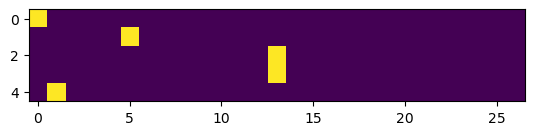

In [25]:
plt.imshow(xenc)

In [26]:
xenc.dtype

torch.float32

In [28]:
# Define the initial weights 
W = torch.randn((27, 1))

# @ is the matrix multiplication operator in PyTorch
xenc @ W

# (5, 27) @ (27, 1) becomes (5, 1)

# We see the 5 activations of this neuron on these 5 inputs. 
# We evaluated all 5 in parallel

tensor([[-0.9450],
        [-0.8675],
        [ 0.0469],
        [ 0.0469],
        [-0.4577]])

In [29]:
# Define the initial weights - but now use 27
W = torch.randn((27, 27))

# @ is the matrix multiplication operator in PyTorch
xenc @ W

# (5, 27) @ (27, 27) -> (5, 27)

tensor([[-0.4050, -0.9299, -0.6481,  0.6235,  0.5574, -1.7058, -0.6512,  0.5664,
          2.8943, -0.7491,  2.2840, -0.8827, -0.2373, -0.0858, -0.1877,  1.7181,
          1.3067,  0.0894,  0.8894,  0.0924,  1.5342,  2.4360,  0.5505, -1.0171,
         -0.2543, -1.1197, -1.3539],
        [ 0.9570, -0.4897,  0.7848, -0.4547, -0.8783, -0.9774,  2.1470, -1.2373,
         -0.4719, -0.0069,  0.5320,  0.7570, -0.6618, -0.9027,  0.5663, -1.1756,
          0.1682,  0.5100,  0.9608,  0.9688,  0.2037,  1.7070,  1.0509,  0.5342,
          0.2714,  0.7632,  0.2250],
        [-1.7065, -1.0598, -0.0503, -1.4475,  1.7381, -0.7777,  0.5428, -0.3042,
          1.3993,  2.1054, -0.5674, -1.8728, -2.2653,  1.1335,  0.1366,  0.0361,
         -0.5821, -1.3296, -1.5413, -0.5854,  1.1948,  0.4949,  0.3228,  0.7131,
          0.9490, -1.1713,  0.2036],
        [-1.7065, -1.0598, -0.0503, -1.4475,  1.7381, -0.7777,  0.5428, -0.3042,
          1.3993,  2.1054, -0.5674, -1.8728, -2.2653,  1.1335,  0.1366,  0.0361

In [30]:
(xenc @ W).shape

torch.Size([5, 27])

In [31]:
# for every 27 neurons, what is the firing rate 

# example
(xenc @ W)[3, 13] # is giving us the firing rate of the 13th neuron looking at the 3rd input 
# it was achieved using the dot product 

tensor(1.1335)

In [33]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
W[:,  13]

tensor([-0.0858, -0.8399, -0.6295, -0.7229,  1.4068, -0.9027,  2.1869, -1.1000,
        -1.3257, -0.2713,  1.0402,  1.4334,  0.0892,  1.1335, -0.9647, -0.4689,
        -0.8481,  1.4082,  0.8332,  1.0009, -0.7036,  0.7822,  0.8614,  0.7214,
         1.7862,  2.1065,  0.0344])

In [35]:
(xenc[3] * W[:, 13]).sum() # the dot product

tensor(1.1335)

In [ ]:
# stopped at 1:19:11